In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
train_dir = "data/train" # Directory containing the training data
test_dir = "data/test"  # Directory containing the validation data

In [6]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [9]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import tensorflow as tf 
from tensorflow.keras.layers import BatchNormalization

# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add a batch normalization layer
model.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third batch normalization layer
model.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a fourth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='relu'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback]
)



Epoch 1/50
358/359 [============================>.] - ETA: 0s - loss: 0.9566 - accuracy: 0.6418
Epoch 1: val_accuracy improved from -inf to 0.64316, saving model to model_weights.h5
359/359 [==============================] - 15s 41ms/step - loss: 0.9562 - accuracy: 0.6418 - val_loss: 0.9729 - val_accuracy: 0.6432
Epoch 2/50
358/359 [============================>.] - ETA: 0s - loss: 0.9543 - accuracy: 0.6445
Epoch 2: val_accuracy improved from 0.64316 to 0.64874, saving model to model_weights.h5
359/359 [==============================] - 15s 41ms/step - loss: 0.9544 - accuracy: 0.6444 - val_loss: 0.9629 - val_accuracy: 0.6487
Epoch 3/50
358/359 [============================>.] - ETA: 0s - loss: 0.9476 - accuracy: 0.6458
Epoch 3: val_accuracy improved from 0.64874 to 0.65014, saving model to model_weights.h5
359/359 [==============================] - 15s 41ms/step - loss: 0.9477 - accuracy: 0.6457 - val_loss: 0.9598 - val_accuracy: 0.6501
Epoch 4/50
359/359 [=============================

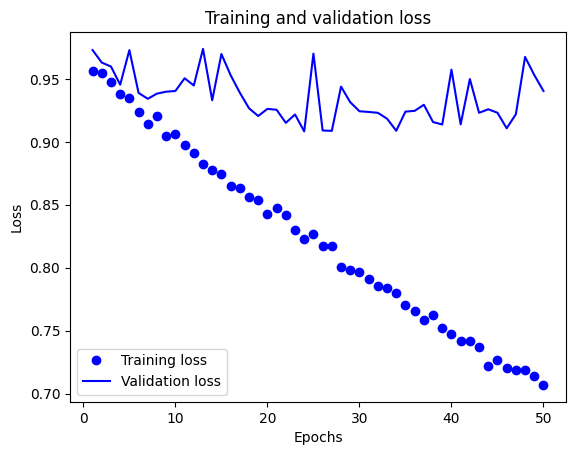

In [12]:
import matplotlib.pyplot as plt
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
model.save("model_emotion.h5")

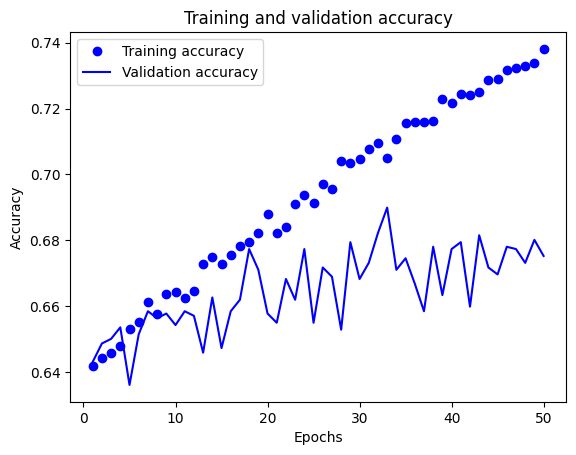

In [13]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
# Evaluate the model
model.load_weights('saved/model_weights.h5')

test_loss, test_accuracy = model.evaluate(validation_generator, steps=len(validation_generator))

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


23/23 [==============================] - 1s 26ms/step - loss: 0.9551 - accuracy: 0.6529
Test Loss: 0.955122172832489
Test Accuracy: 0.6529329419136047


In [21]:
model.save('saved/model_weights_loss 0.9551 accuracy 0.6529.h5')

In [1]:
import cv2
import numpy as np
import tensorflow as tf

# Load the face detector with the correct file path
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the emotion model
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
emotion_model = tf.keras.models.load_model("saved/model_loss 0.9551 accuracy 0.6529.h5")
# emotion_model.load_weights("model_weights_new.h5")
print("Loaded emotion model from disk")

# Define the predict_img function
def predict_img(frame):
    # Resize the image
    frame = cv2.resize(frame, (1280, 720))
    num_faces = face_detector.detectMultiScale(frame, scaleFactor=1.3, minNeighbors=5)

    # Draw bounding boxes and annotate the image
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = frame[y:y + h, x:x + w]

        # Preprocess the input image
        resized_img = cv2.resize(roi_gray_frame, (48, 48))
        gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        input_img = np.expand_dims(gray_img, axis=-1)  # Add the channel dimension
        input_img = np.expand_dims(input_img, axis=0)  # Add the batch dimension

        # Normalize the image
        input_img = input_img / 255.0

        # Predict the emotions
        emotion_prediction = emotion_model.predict(input_img)
        maxindex = int(np.argmax(emotion_prediction))
        emotion_label = emotion_dict[maxindex]

        # Annotate the image with emotion label
        cv2.putText(frame, emotion_label, (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    return frame

# Capture video from webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    annotated_frame = predict_img(frame)
    cv2.imshow('Emotion Detection', annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Loaded emotion model from disk
1/1 [==============================] - 0s 19ms/step


KeyboardInterrupt: 